In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI

/content/drive/MyDrive/AI


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('genetics_data.csv')

In [ ]:
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

<Axes: xlabel='Gene One', ylabel='Gene Two'>

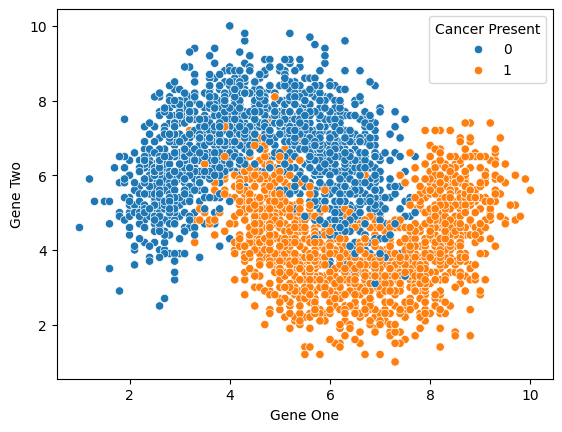

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)

In [8]:
x=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
x_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [17]:
accuracy_score(x_pred,y_test)

0.92

In [19]:
print(classification_report(x_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       332
           1       0.90      0.92      0.91       268

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [20]:
cm = confusion_matrix(x_pred,y_test)
cm

array([[306,  26],
       [ 22, 246]])

In [21]:
sns.heatmap(cm,annot=True)

<Axes: >

In [ ]:
#Elbow method for finding reasonable k value
test_error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  x_pred = knn_model_predict(sc_X_test)
